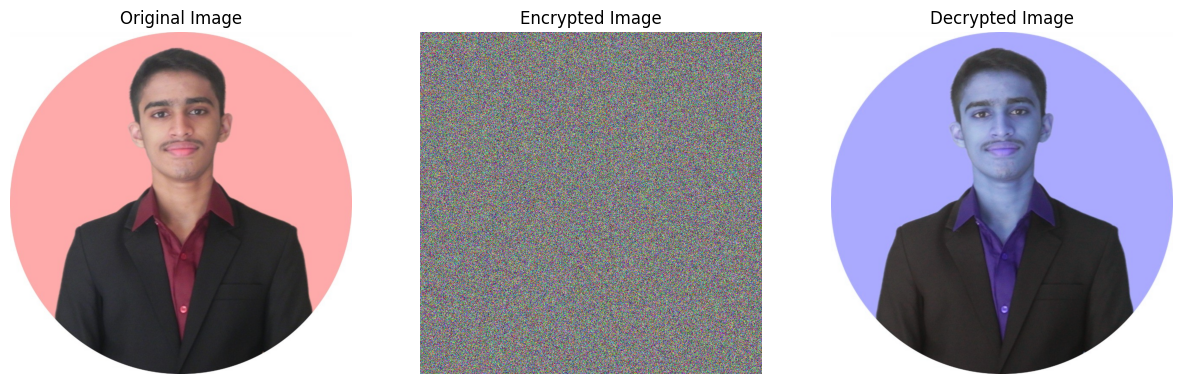

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def xor_encrypt_decrypt(image, key):
    image_np = np.array(image)
    key_np = np.array(key)
    
    key_np = np.resize(key_np, image_np.shape)
    
    result = np.bitwise_xor(image_np, key_np)
    return result

# Load the image
image_path = 'hidden_image.png'
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load the image.")
else:
    # Define a secret key (should be the same length as the number of pixels in the image)
    key = np.random.randint(0, 256, size=image.shape, dtype=np.uint8)

    encrypted_image = xor_encrypt_decrypt(image, key)

    decrypted_image = xor_encrypt_decrypt(encrypted_image, key)

    # Display images using Matplotlib
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(encrypted_image, cmap='gray')
    axes[1].set_title('Encrypted Image')
    axes[1].axis('off')

    axes[2].imshow(decrypted_image, cmap='gray')
    axes[2].set_title('Decrypted Image')
    axes[2].axis('off')

    plt.show()
